<a href="https://colab.research.google.com/github/brishashrestha/Portfolio/blob/main/Worksheet-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


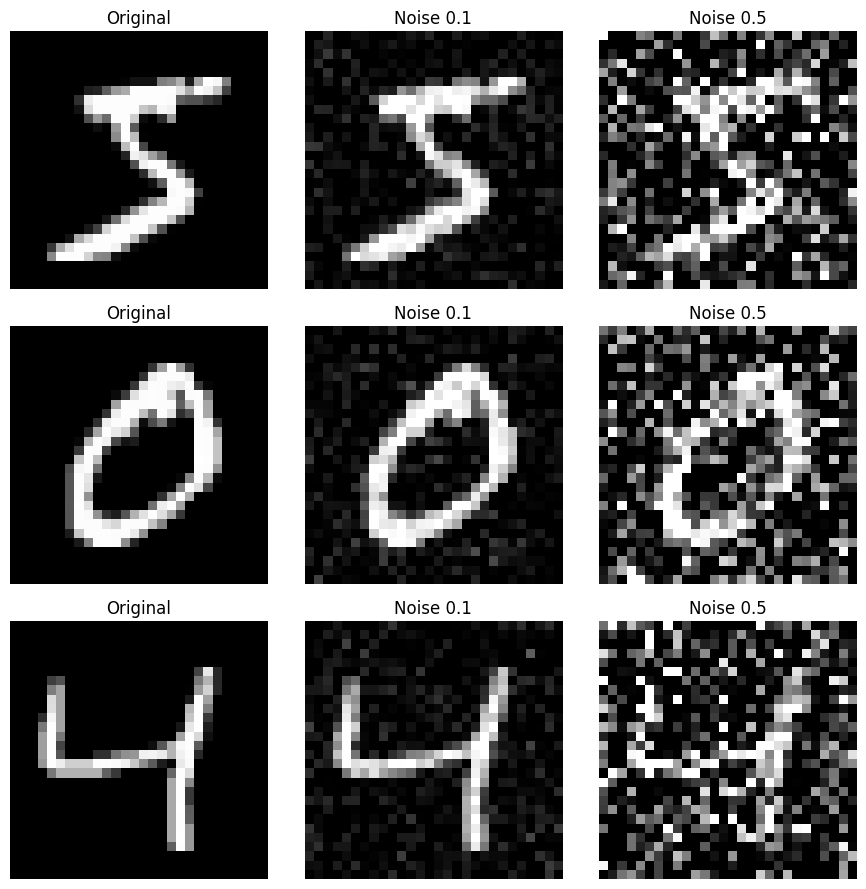

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 308ms/step - loss: 0.2006 - val_loss: 0.0781
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 132s 282ms/step - loss: 0.0775 - val_loss: 0.0739
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 135s 288ms/step - loss: 0.0738 - val_loss: 0.0717
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 280ms/step - loss: 0.0720 - val_loss: 0.0709
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 268ms/step - loss: 0.0711 - val_loss: 0.0699
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 135s 287ms/step - loss: 0.0702 - val_loss: 0.0694
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 134s 286ms/step - loss: 0.0697 - val_loss: 0.0688
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 288ms/step - loss: 0.0691 - val_loss: 0.0684
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 292ms/step - loss: 0.0688 - val_loss: 0.0683
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 295ms/step - loss: 0.0685 - val_loss: 0.0678
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


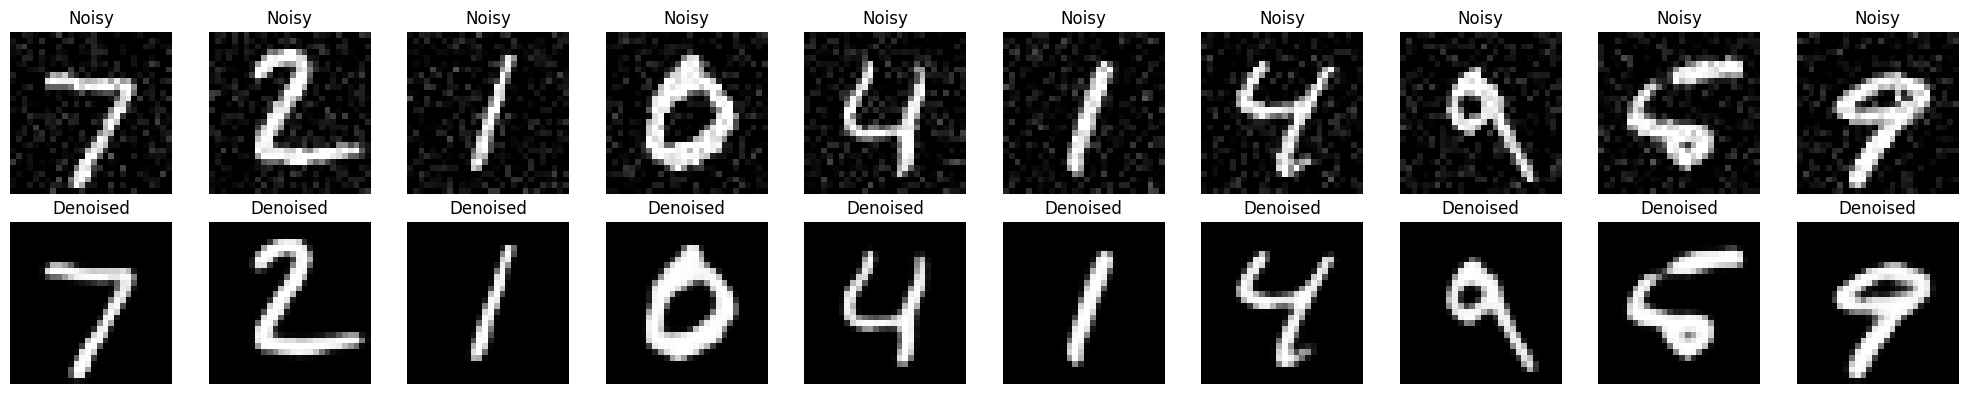

In [1]:
# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Step 2: Load and Preprocess the Data
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Step 3: Add Gaussian Noise
noise_factor_low = 0.1
noise_factor_high = 0.5

x_train_noisy_low = x_train + noise_factor_low * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy_low = x_test + noise_factor_low * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy_high = x_train + noise_factor_high * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy_high = x_test + noise_factor_high * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy_low = np.clip(x_train_noisy_low, 0., 1.)
x_test_noisy_low = np.clip(x_test_noisy_low, 0., 1.)
x_train_noisy_high = np.clip(x_train_noisy_high, 0., 1.)
x_test_noisy_high = np.clip(x_test_noisy_high, 0., 1.)

# Step 4: Visualize the Noisy Images
n = 3
plt.figure(figsize=(9, 9))
for i in range(n):
    # Original
    ax = plt.subplot(n, 3, i * 3 + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Low Noise
    ax = plt.subplot(n, 3, i * 3 + 2)
    plt.imshow(x_train_noisy_low[i].reshape(28, 28), cmap='gray')
    plt.title("Noise 0.1")
    plt.axis('off')

    # High Noise
    ax = plt.subplot(n, 3, i * 3 + 3)
    plt.imshow(x_train_noisy_high[i].reshape(28, 28), cmap='gray')
    plt.title("Noise 0.5")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Step 5: Build the Autoencoder
from tensorflow.keras import Input

def build_autoencoder():
    input_img = Input(shape=(28, 28, 1))

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Step 6: Train the Model (using low noise for training)
autoencoder.fit(x_train_noisy_low, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy_low, x_test))

# Step 7: Visualize Reconstructed Images
decoded_imgs = autoencoder.predict(x_test_noisy_low)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy input
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy_low[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Reconstructed output
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.tight_layout()
plt.show()